importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


importing data

In [4]:
df=pd.read_csv('/content/netflix_customer_churn.csv')

In [5]:
df.head(2)

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi


checking null and duplicate

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [7]:
df.duplicated().sum()

np.int64(0)

checking outlier and data distribution
of numeric
      
      
      features =[age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day]

<Axes: ylabel='age'>

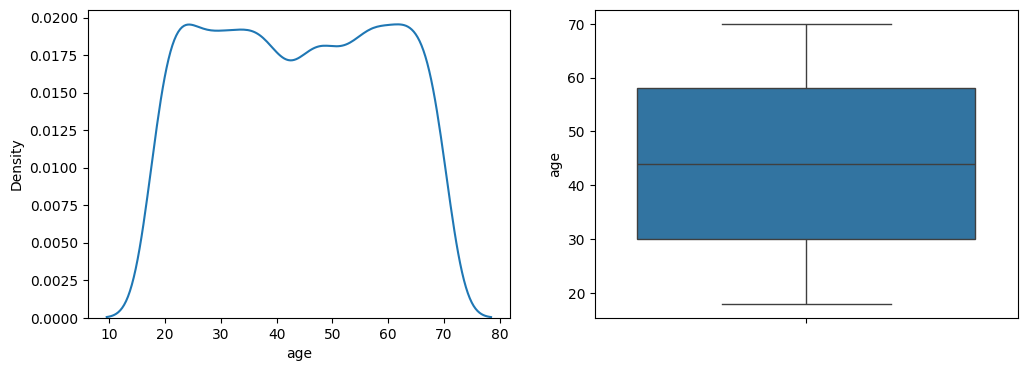

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(df['age'],ax=axes[0])
sns.boxplot(df['age'],ax=axes[1])


<Axes: ylabel='watch_hours'>

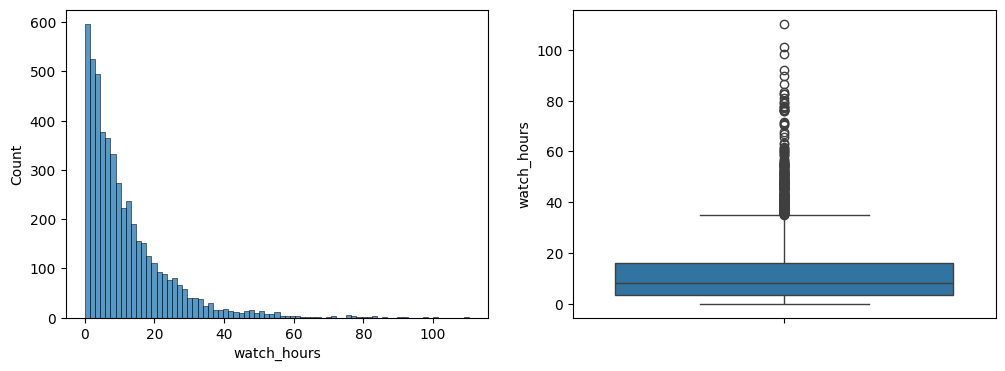

In [9]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
sns.histplot(df['watch_hours'],ax=axes[0])
sns.boxplot(df['watch_hours'],ax=axes[1])

<Axes: ylabel='last_login_days'>

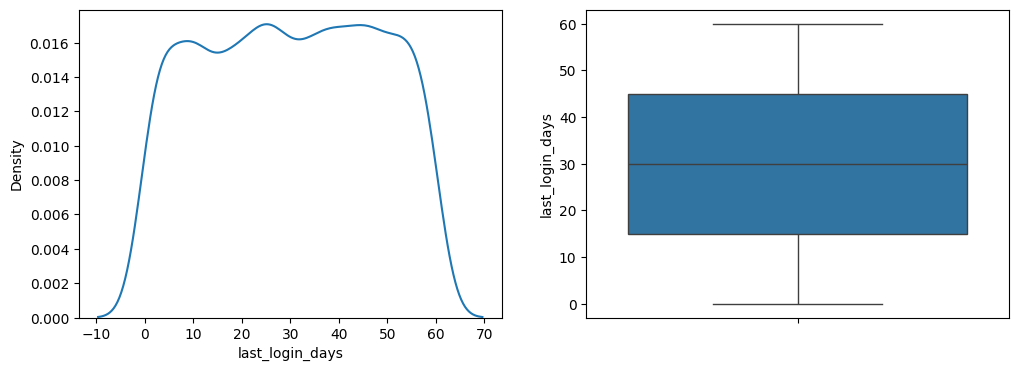

In [10]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
sns.kdeplot(df['last_login_days'],ax=axes[0])
sns.boxplot(df['last_login_days'],ax=axes[1])

<Axes: ylabel='monthly_fee'>

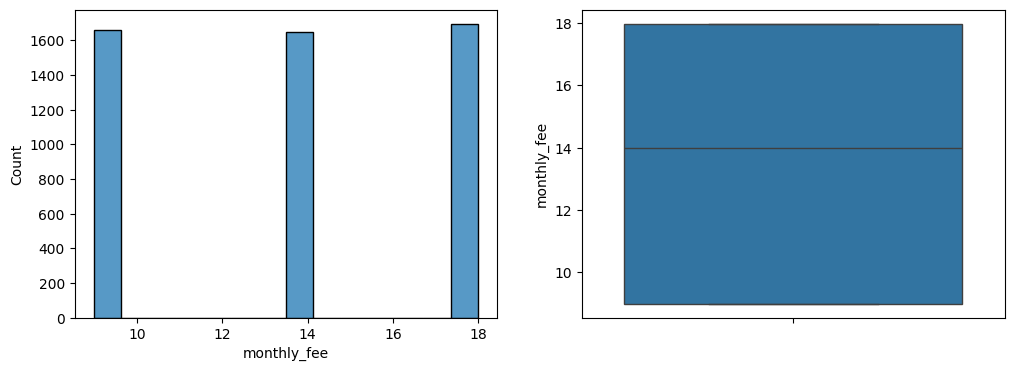

In [11]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
sns.histplot(df['monthly_fee'],ax=axes[0])
sns.boxplot(df['monthly_fee'],ax=axes[1])

<Axes: ylabel='avg_watch_time_per_day'>

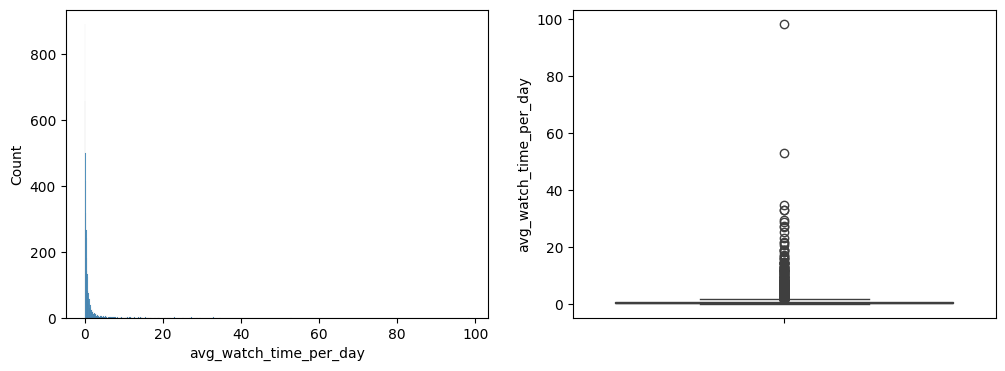

In [12]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
sns.histplot(df['avg_watch_time_per_day'],ax=axes[0])
sns.boxplot(df['avg_watch_time_per_day'],ax=axes[1])

In [13]:
df.head(3)

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama


handling categorical feature

In [14]:
df['gender'].value_counts()


,count
gender,
Female,1711
Male,1654
Other,1635


In [15]:
df['subscription_type'].value_counts()


,count
subscription_type,
Premium,1693
Basic,1661
Standard,1646


In [16]:

df['region'].value_counts()

,count
region,
South America,873
Europe,867
North America,851
Asia,841
Africa,803
Oceania,765


In [17]:
df['payment_method'].value_counts()

,count
payment_method,
Debit Card,1030
PayPal,1026
Crypto,995
Gift Card,976
Credit Card,973


In [18]:
df['device'].value_counts()

,count
device,
Tablet,1048
Laptop,1006
Mobile,1004
TV,993
Desktop,949


In [19]:
df['favorite_genre'].value_counts()

,count
favorite_genre,
Drama,731
Documentary,729
Romance,725
Sci-Fi,720
Horror,713
Action,697
Comedy,685


In [20]:
df.drop(columns=['customer_id'],inplace=True)

In [21]:
df.head(2)

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi


In [22]:
df['churned'].value_counts()

,count
churned,
1,2515
0,2485


In [23]:
x=df.drop(columns=['churned','gender','device','number_of_profiles'])
y=df['churned']

In [24]:
x.head(1)

,age,subscription_type,watch_hours,last_login_days,region,monthly_fee,payment_method,avg_watch_time_per_day,favorite_genre
0,51,Basic,14.73,29,Africa,8.99,Gift Card,0.49,Action


In [25]:
y.head(1)

,churned
0,1


In [26]:
x.columns

Index(['age', 'subscription_type', 'watch_hours', 'last_login_days', 'region',
       'monthly_fee', 'payment_method', 'avg_watch_time_per_day',
       'favorite_genre'],
      dtype='object')

In [27]:
x['region'].value_counts()

,count
region,
South America,873
Europe,867
North America,851
Asia,841
Africa,803
Oceania,765


In [28]:
x['monthly_fee'].value_counts()

,count
monthly_fee,
17.99,1693
8.99,1661
13.99,1646


In [29]:
x['favorite_genre'].value_counts()

,count
favorite_genre,
Drama,731
Documentary,729
Romance,725
Sci-Fi,720
Horror,713
Action,697
Comedy,685


In [30]:
x['payment_method'].value_counts()

,count
payment_method,
Debit Card,1030
PayPal,1026
Crypto,995
Gift Card,976
Credit Card,973


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [33]:
ct=ColumnTransformer(transformers=[("encode",OneHotEncoder(),['subscription_type','region','payment_method','favorite_genre'])])

In [34]:
x_train_trans=ct.fit_transform(x_train)
x_test_trans=ct.transform(x_test)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [37]:
lr=LogisticRegression(C=9, max_iter=90, penalty='l1', solver='saga')


In [38]:
lr.fit(x_train_trans,y_train)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=9, max_iter=90, penalty='l1', solver='saga')

In [39]:
lr_pred=lr.predict(x_test_trans)

In [40]:
accuracy_score(y_test,lr_pred)

0.614

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test,lr_pred)

array([[268, 230],
       [156, 346]])

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [44]:
y_ppred_probab=lr.predict_proba(x_test_trans)[:,1]

In [45]:
tpr,fpr,thresholds=roc_curve(y_test,y_ppred_probab)

Text(0.5, 1.0, 'roc curve')

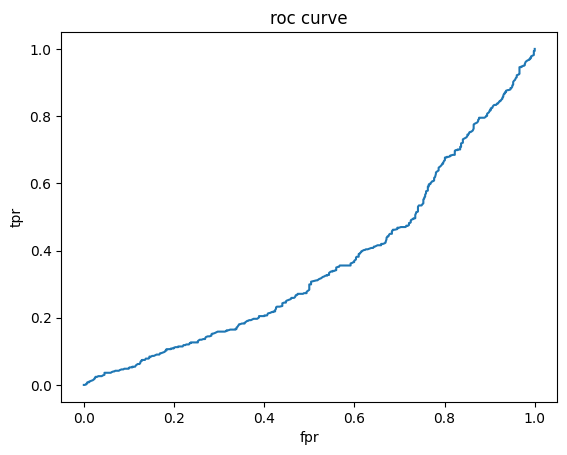

In [46]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')

In [47]:
y_pred_lr_new=lr.predict_proba(x_test_trans)[:,1]

In [48]:
threshold =0.42

In [49]:
yy_pred=(y_pred_lr_new>threshold).astype(int)

In [50]:
confusion_matrix(y_test,yy_pred)

array([[216, 282],
       [122, 380]])

In [51]:
from sklearn.metrics import precision_score,recall_score

In [52]:
precision_score(y_test,yy_pred)

0.5740181268882175

In [53]:
recall_score(y_test,yy_pred)

0.7569721115537849

In [54]:
accuracy_score(y_test,yy_pred)

0.596

Text(0.5, 1.0, 'roc curve')

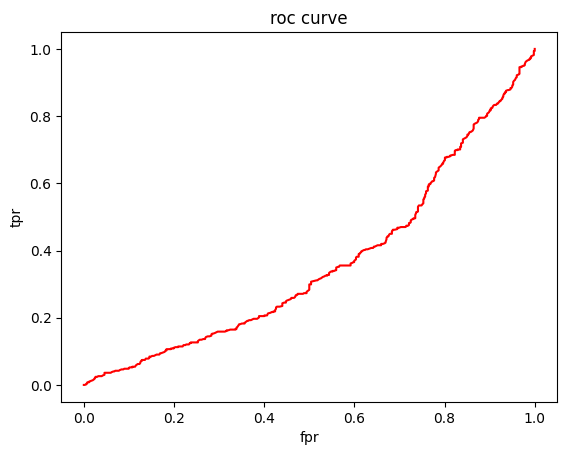

In [55]:
plt.plot(fpr,tpr,color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')

In [56]:
num=df.select_dtypes(include=['int','float']).columns

In [57]:
num

Index(['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'churned',
       'number_of_profiles', 'avg_watch_time_per_day'],
      dtype='object')

In [58]:
numeric_column=df[num]

In [59]:
numeric_column

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
0,51,14.73,29,8.99,1,1,0.49
1,47,0.70,19,13.99,1,5,0.03
2,27,16.32,10,13.99,0,2,1.48
3,53,4.51,12,17.99,1,2,0.35
4,56,1.89,13,13.99,1,2,0.13
...,...,...,...,...,...,...,...
4995,19,49.17,11,8.99,0,4,4.10
4996,67,9.24,2,8.99,0,3,3.08
4997,66,16.55,49,13.99,1,2,0.33
4998,59,9.12,3,8.99,0,4,2.28


<Axes: >

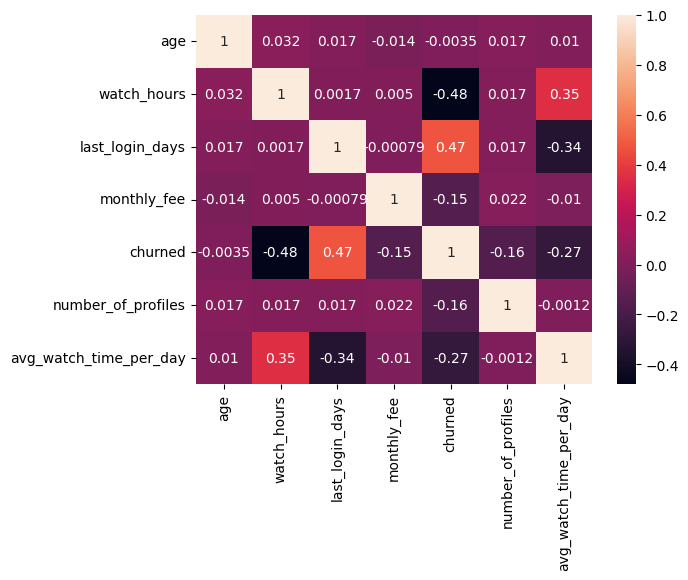

In [60]:
sns.heatmap(numeric_column.corr(),annot=True)

In [61]:
from sklearn.feature_selection import mutual_info_classif

In [62]:
x_test_trans_with_name=ct.get_feature_names_out(x_train.columns)

In [63]:
x_test_trans_with_name

array(['encode__subscription_type_Basic',
       'encode__subscription_type_Premium',
       'encode__subscription_type_Standard', 'encode__region_Africa',
       'encode__region_Asia', 'encode__region_Europe',
       'encode__region_North America', 'encode__region_Oceania',
       'encode__region_South America',
       'encode__payment_method_Credit Card',
       'encode__payment_method_Crypto',
       'encode__payment_method_Debit Card',
       'encode__payment_method_Gift Card',
       'encode__payment_method_PayPal', 'encode__favorite_genre_Action',
       'encode__favorite_genre_Comedy',
       'encode__favorite_genre_Documentary',
       'encode__favorite_genre_Drama', 'encode__favorite_genre_Horror',
       'encode__favorite_genre_Romance', 'encode__favorite_genre_Sci-Fi'],
      dtype=object)

In [64]:
mi=mutual_info_classif(x_test_trans,y_test)

In [65]:
mi_df = pd.DataFrame({
    'feature': x_test_trans_with_name,
    'mi_score': mi
}).sort_values(by='mi_score', ascending=False)

mi_df.sort_values(by='mi_score', ascending=False)


,feature,mi_score
0,encode__subscription_type_Basic,1.640392e-02
11,encode__payment_method_Debit Card,8.085505e-03
10,encode__payment_method_Crypto,6.845264e-03
1,encode__subscription_type_Premium,5.485171e-03
6,encode__region_North America,3.509499e-03
9,encode__payment_method_Credit Card,3.499887e-03
2,encode__subscription_type_Standard,2.600847e-03
20,encode__favorite_genre_Sci-Fi,2.145299e-03
12,encode__payment_method_Gift Card,1.430205e-03
8,encode__region_South America,8.693348e-04


In [66]:
import joblib

In [67]:
joblib.dump(lr,'netflix_churn_prediction model.pkl')

['netflix_churn_prediction model.pkl']

In [68]:
joblib.dump(ct,'transformer.pkl')

['transformer.pkl']